# Lesson 9 Assignment - Deep Learning
Version: August-2020

## Author - Priya Asokan

## Instructions

Using the CIFAR-10 dataset (Links to an external site.), create a new notebook to build a TensorFLow model. Perform each of the following tasks and answer the related questions:

1. Read CIFAR-10 dataset from Keras. (Links to an external site.)
2. Explore data
3. Preprocess and prepare data for classification
4. Build a TensorFlow model using a single dense hidden layer
5. Apply model to test set and evaluate accuracy
6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy
7. Summarize your findings regarding the different iterations and any insights gained

## Summary
1. Built a tensor flow model with a single dense hiiden layer. Applied that model to test set and obtained an accuracy - 0.42
2. Performed three different adjusts to CNN model
    - 1 Convolution layer +pool + 1 Convolution layer +pool + 1 fully connected layer. Accuracy on the test set with this CNN model setting  - 0.69
    - 1 Convolution layer + 1 pool + 2 convolution layers + pool +1 fully connected layer. Accuracy on the test set with this above CNN model setting  -0.70
    - 2 convolution layers + pool +1 fully connected layer. Accuracy on the test set with the above CNN model setting - 0.68
    
##### 1 Convolution layer + 1 pool + 2 convolution layers + pool +1 fully connected layer CNN model performs better when compared to other models.
##### Accuracy improved from 0.42 to 0.70 using CNN model

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
tf.random.set_seed(1234)

## Read Dataset From Keras

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
#load the data into train and test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print("Training data dimensions: {}".format(X_train.shape))
print("Test data dimensions: {}".format(X_test.shape))

Training data dimensions: (50000, 32, 32, 3)
Test data dimensions: (10000, 32, 32, 3)


In [6]:
X_train[0, 0:10, 0:10]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        [ 68,  54,  42],
        [ 98,  73,  52],
        [119,  91,  63],
        [139, 107,  75],
        [145, 110,  80],
        [149, 117,  89],
        [149, 120,  93]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        [ 51,  27,   8],
        [ 88,  51,  21],
        [120,  82,  43],
        [128,  89,  45],
        [127,  86,  44],
        [126,  87,  50],
        [116,  79,  44]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        [ 83,  50,  23],
        [110,  72,  41],
        [129,  92,  54],
        [130,  93,  55],
        [121,  82,  47],
        [113,  77,  43],
        [112,  78,  44]],

       [[ 33,  25,  17],
        [ 38,  20,   4],
        [ 87,  54,  25],
        [106,  63,  28],
        [115,  70,  33],
        [117,  74,  35],
        [114,  72,  37],
        [105,  62,  33],
        [107,  68,  33],
        [121,  84, 

In [7]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
# y_train[0]
x = np.unique(y_train)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Exploratory Data Analysis

C:\Users\priya\.conda\envs\uwdatasci420\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


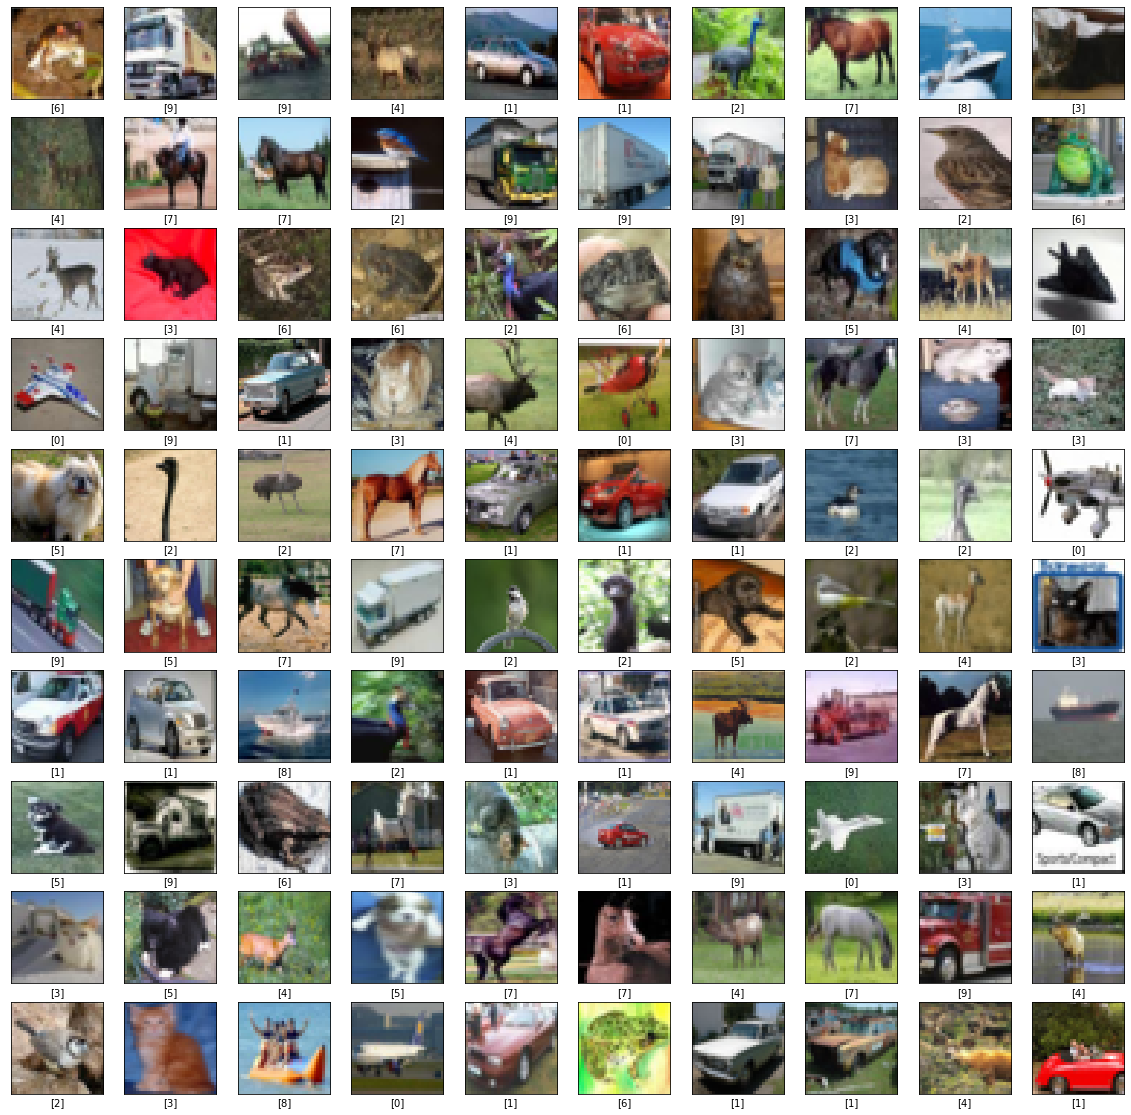

In [9]:
# View the data
plt.figure(figsize = (20, 20))
for i in range(10*10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

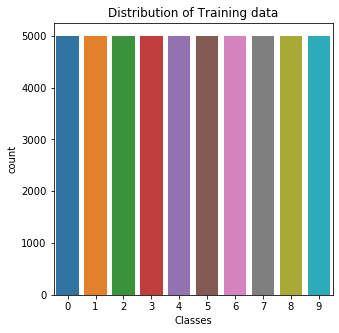

In [10]:
# Count plot for training set
plt.figure(figsize=(5,5))
sns.countplot(y_train.ravel())
plt.title('Distribution of Training data')
plt.xlabel('Classes')
plt.show()

## Build TendorFlow Model

In [11]:
# Tensorfloe model with one hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile Model 
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
# Fit the model
model.fit(X_train, 
          y_train, 
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 72us/sample - loss: 1.9371 - accuracy: 0.3076 - val_loss: 1.8283 - val_accuracy: 0.3358
Epoch 2/10
50000/50000 [==============================] - 3s 59us/sample - loss: 1.7664 - accuracy: 0.3715 - val_loss: 1.7320 - val_accuracy: 0.3854
Epoch 3/10
50000/50000 [==============================] - 3s 58us/sample - loss: 1.7197 - accuracy: 0.3882 - val_loss: 1.6893 - val_accuracy: 0.3973
Epoch 4/10
50000/50000 [==============================] - 3s 54us/sample - loss: 1.6945 - accuracy: 0.4006 - val_loss: 1.7225 - val_accuracy: 0.3923
Epoch 5/10
50000/50000 [==============================] - 3s 59us/sample - loss: 1.6738 - accuracy: 0.4059 - val_loss: 1.6597 - val_accuracy: 0.4099
Epoch 6/10
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6560 - accuracy: 0.4124 - val_loss: 1.6512 - val_accuracy: 0.4177
Epoch 7/10
50000/50000 [==============================] 

## Model Performance On Test Set

In [15]:
# evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.4208


### Perform 3 Adjust using Convolutional Neural Networks

### 1 Convolution layer +pool + 1 Convolution layer+pool + 1 fully connected layer



In [16]:
# indicate that it had three channels
X_train_reshape = X_train.reshape(-3, 32, 32, 3)
X_test_reshape = X_test.reshape(-3, 32, 32, 3)

In [17]:
print(X_train.shape)
print(X_train_reshape.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [18]:
# Build the first CNN model (1 Convolution layer +pool + 1 Convolution layer+pool + 1 fully connected layer)
model_1 = keras.models.Sequential([
    
    # Convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=1, padding="same", activation="relu", input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),

    # Convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same", activation="relu"),    
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),

    # Fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),

    # Output layer
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
# Model Summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [20]:
# train
model_1.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
# Fit the model
history = model_1.fit(X_train_reshape, 
                    y_train, 
                    batch_size=64, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_test_reshape, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.5696 - accuracy: 0.4608 - val_loss: 1.3379 - val_accuracy: 0.5483
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.2424 - accuracy: 0.5924 - val_loss: 1.1589 - val_accuracy: 0.6236
Epoch 3/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.1208 - accuracy: 0.6405 - val_loss: 1.1131 - val_accuracy: 0.6423
Epoch 4/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.0518 - accuracy: 0.6684 - val_loss: 1.0701 - val_accuracy: 0.6639
Epoch 5/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.9955 - accuracy: 0.6907 - val_loss: 1.0912 - val_accuracy: 0.6534
Epoch 6/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.9524 - accuracy: 0.7096 - val_loss: 1.0655 - val_accuracy: 0.6718
Epoch 7/10
50000/50000 [==============================] 

In [22]:
# model performance
model_1.evaluate(X_test_reshape, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0391879623413085, 0.6916]

In [23]:
# predict
y_test_prob = model_1.predict(X_test_reshape, verbose=0)
y_test_pred = model_1.predict_classes(X_test_reshape, verbose=0)

In [24]:
history_dict = history.history
history_dict

{'loss': [1.5696024096298218,
  1.2424191004943848,
  1.120768439025879,
  1.0518143836212157,
  0.9954613817596436,
  0.9524266086769104,
  0.9146623811721801,
  0.8799745268058777,
  0.8536287666893005,
  0.8236474740219116],
 'accuracy': [0.46076,
  0.5924,
  0.64046,
  0.66836,
  0.69068,
  0.70956,
  0.72176,
  0.7365,
  0.7468,
  0.75818],
 'val_loss': [1.3378931951522828,
  1.1589395139694214,
  1.1130910139083863,
  1.070146700668335,
  1.0911661294937134,
  1.0655184685707093,
  1.0938164735794067,
  1.0716693347930908,
  1.0247156152725219,
  1.0391879663467407],
 'val_accuracy': [0.5483,
  0.6236,
  0.6423,
  0.6639,
  0.6534,
  0.6718,
  0.6654,
  0.6786,
  0.6994,
  0.6916]}

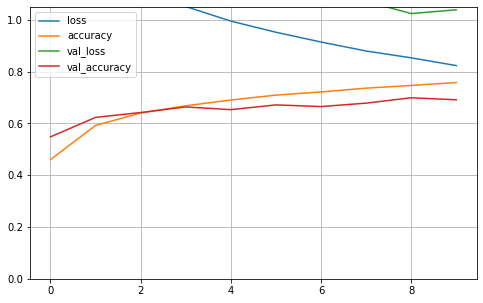

In [25]:
# plot history
pd.DataFrame(history_dict).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.05) 
plt.show()

### 1 Convolution + 1 pool + 2 convolution + pool +1 fully connected layer

In [26]:
# Build CNN model with a different adjusts(1 Convolution + 1 pool + 2 convolution + pool +1 fully connected layer)
model_2 = keras.models.Sequential([
    
    # Convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=1, padding="same", activation="relu", input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),

    # Convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),

    # Fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),

    # Output layer
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
# model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [28]:
# train
model_2.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
history = model_2.fit(X_train_reshape, 
                    y_train, 
                    batch_size=64, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_test_reshape, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 122s 2ms/sample - loss: 1.5683 - accuracy: 0.4545 - val_loss: 1.3113 - val_accuracy: 0.5523
Epoch 2/10
50000/50000 [==============================] - 141s 3ms/sample - loss: 1.2047 - accuracy: 0.5982 - val_loss: 1.1232 - val_accuracy: 0.6315
Epoch 3/10
50000/50000 [==============================] - 139s 3ms/sample - loss: 1.0614 - accuracy: 0.6564 - val_loss: 1.0427 - val_accuracy: 0.6674
Epoch 4/10
50000/50000 [==============================] - 144s 3ms/sample - loss: 0.9653 - accuracy: 0.6938 - val_loss: 1.0419 - val_accuracy: 0.6693
Epoch 5/10
50000/50000 [==============================] - 148s 3ms/sample - loss: 0.9024 - accuracy: 0.7184 - val_loss: 0.9674 - val_accuracy: 0.7017
Epoch 6/10
50000/50000 [==============================] - 152s 3ms/sample - loss: 0.8448 - accuracy: 0.7423 - val_loss: 1.0221 - val_accuracy: 0.6909
Epoch 7/10
50000/50000 [==========================

In [30]:
# model performance
model_2.evaluate(X_test_reshape, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0456864997863768, 0.702]

In [31]:
# predict
y_test_prob = model_2.predict(X_test_reshape, verbose=0)
y_test_pred = model_2.predict_classes(X_test_reshape, verbose=0)

In [32]:
history_dict = history.history
history_dict

{'loss': [1.5682814863586425,
  1.2047300164413453,
  1.0614245595169067,
  0.965320064201355,
  0.9023700218582154,
  0.8447656310844421,
  0.8053857584381103,
  0.761895569190979,
  0.7270928410720825,
  0.6940147316932678],
 'accuracy': [0.4545,
  0.5982,
  0.65638,
  0.69382,
  0.71836,
  0.7423,
  0.75648,
  0.77422,
  0.78776,
  0.801],
 'val_loss': [1.3113355182647706,
  1.1231610174179076,
  1.0427263746261597,
  1.0419381507873535,
  0.9673809598922729,
  1.0221262435913085,
  0.9801813013076782,
  0.9860521162033081,
  1.008327940940857,
  1.0456864994049073],
 'val_accuracy': [0.5523,
  0.6315,
  0.6674,
  0.6693,
  0.7017,
  0.6909,
  0.7036,
  0.708,
  0.7051,
  0.702]}

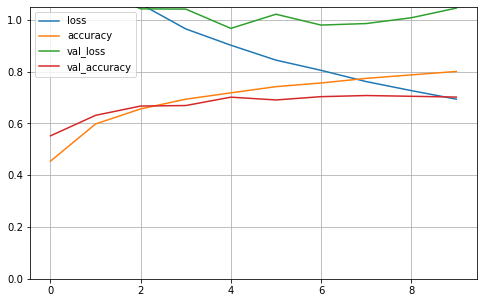

In [33]:
# plot history
pd.DataFrame(history_dict).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.05) 
plt.show()

###  2 convolution + pool +1 fully connected layer

In [34]:
# Build CNN model with a different adjusts(2 convolution + pool +1 fully connected layer)
model_3 = keras.models.Sequential([
    
    # Convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=1, padding="same", activation="relu", input_shape=(32,32,3)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),   

    # Fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),

    # Output layer
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1048640   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 1,070,218
Trainable params: 1,070,218
Non-trainable params: 0
____________________________________________

In [36]:
# train
model_3.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
history = model_3.fit(X_train_reshape, 
                    y_train, 
                    batch_size=64, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_test_reshape, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 171s 3ms/sample - loss: 1.5474 - accuracy: 0.4777 - val_loss: 1.3083 - val_accuracy: 0.5725
Epoch 2/10
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.2304 - accuracy: 0.6131 - val_loss: 1.1948 - val_accuracy: 0.6309
Epoch 3/10
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.1311 - accuracy: 0.6534 - val_loss: 1.1206 - val_accuracy: 0.6618
Epoch 4/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 1.0722 - accuracy: 0.6777 - val_loss: 1.1395 - val_accuracy: 0.6598
Epoch 5/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 1.0305 - accuracy: 0.6971 - val_loss: 1.1767 - val_accuracy: 0.6447
Epoch 6/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 0.9883 - accuracy: 0.7167 - val_loss: 1.1614 - val_accuracy: 0.6648
Epoch 7/10
50000/50000 [==========================

In [38]:
# model performance
model_3.evaluate(X_test_reshape, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.1483094270706178, 0.6887]

In [39]:
# predict
y_test_prob = model_3.predict(X_test_reshape, verbose=0)
y_test_pred = model_3.predict_classes(X_test_reshape, verbose=0)

In [40]:
history_dict = history.history
history_dict

{'loss': [1.5474098301315307,
  1.2304395337295533,
  1.131065588645935,
  1.0721525693511962,
  1.0304829523086547,
  0.9882785110092163,
  0.962103466835022,
  0.9317892152404785,
  0.8993904996109009,
  0.8774228959655762],
 'accuracy': [0.47768,
  0.61308,
  0.65336,
  0.67766,
  0.69714,
  0.71672,
  0.7296,
  0.74292,
  0.7592,
  0.77152],
 'val_loss': [1.3083177379608155,
  1.1947885223388672,
  1.1206427362442017,
  1.1395310356140136,
  1.1767485523223877,
  1.1613997148513795,
  1.145471776008606,
  1.154815357208252,
  1.1514991672515869,
  1.148309425163269],
 'val_accuracy': [0.5725,
  0.6309,
  0.6618,
  0.6598,
  0.6447,
  0.6648,
  0.6692,
  0.6699,
  0.6802,
  0.6887]}

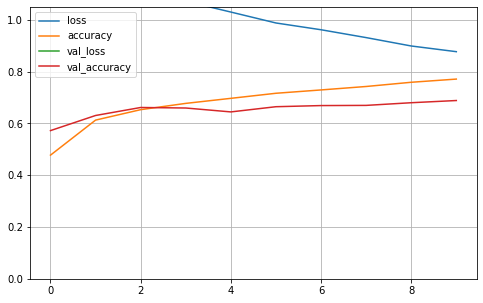

In [41]:
# plot history
pd.DataFrame(history_dict).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.05) 
plt.show()